In [1]:
import sys
sys.path.append('/home/andrea/Dropbox/CIMAT/TESIS/lstmsss/keypoints/partes')
import numpy as np
from process_file import process_file_modif
from process_file import process_file_modif_varios
import batches_data
import model

import tensorflow as tf 
tf.reset_default_graph()

import entrenamientoevaluacion
from entrenamientoevaluacion import evaluate
from interaccion_no_normalizada import batch_vecinos

In [2]:
#en marco mundo

zara02_pix_path = '../data1/ucy/zara/zara02/mundo/mun_pos.csv'
#zara02_pix_path = '../data1/pets/PETS2009-S2L1-M_alreves.csv'
class parameters:
    def __init__(self):
        self.person_max = 26 # 8
        self.obs_len = 8
        self.pred_len = 12
        self.add_social = True
        self.kp_num = 18
        self.add_kp = False
        

In [3]:
## Cargamos los argumentos
arguments = parameters()

# Procesamos los datos de Zara0X
data_zara02 = process_file_modif(zara02_pix_path, arguments, ',')

El numero total de ejemplos
5910


In [ ]:
data_zara02['obs_traj'][0]

In [ ]:
data_zara02['obs_person'][0]

# Se calcula el flujo optico

In [ ]:
#vector = batch_vecinos(data_zara02['obs_person'],data_zara02['key_idx'],data_zara02['obs_traj'],arguments)
#np.save('flujo_bien_non_pets_total_mundo_12.npy',vector )

# Se carga el flujo optico

In [4]:
vector_flujo = 'flujo_bien_non_zara02_total_mundo_12.npy'
flujo = np.load(vector_flujo)
flujo.shape

(5910, 8, 64)

In [ ]:
flujo[0][7]

# Agregamos el flujo al diccionario

In [5]:
data_zara02.update({
    "obs_flujo": flujo,
        })

# Division de los conjuntos de entrenamiento, prueba y validacion

In [6]:
#se fija la semilaa
import random
random.seed(0)

# Muestreamos aleatoriamente para separar datos de entrenamiento, validacion y prueba
prob = 0.7 
# La cantidad total de listas de tam 8 
ndata = len(data_zara02[list(data_zara02.keys())[2]])
idx = random.sample(range(ndata), ndata)
long1 = int(ndata*prob)
long2 = int(ndata*0.2)
long3 = int(ndata-long1-long2)

idx_train = idx[0:long1]
idx_test = idx[long1:long1+long2]
idx_val = idx[long1+long2:]

# conjunto de entrenamiento
data1 = {
     "obs_traj": data_zara02["obs_traj"][idx_train],
     "obs_traj_rel": data_zara02["obs_traj_rel"][idx_train],
    
     "pred_traj": data_zara02["pred_traj"][idx_train],
     "pred_traj_rel": data_zara02["pred_traj_rel"][idx_train],
    
     "key_idx": data_zara02["key_idx"][[idx_train]],
    
     
     "obs_flujo" : data_zara02["obs_flujo"][idx_train],
     #"pred_kp": data_pets["pred_kp"][idx_train],
     #"obs_person": data_pets["obs_person"][idx_train],
}

# Conjunto de prueba
data2 = {
     "obs_traj": data_zara02["obs_traj"][idx_test],
     "obs_traj_rel": data_zara02["obs_traj_rel"][idx_test],
     "pred_traj": data_zara02["pred_traj"][idx_test],
     "pred_traj_rel": data_zara02["pred_traj_rel"][idx_test],
     "key_idx": data_zara02["key_idx"][[idx_test]],
     "obs_flujo" : data_zara02["obs_flujo"][idx_test],
     #"pred_kp": data_pets["pred_kp"][idx_test],
     #"obs_person": data_pets["obs_person"][idx_test]
}

# conjunto de validacion
data3 ={
     "obs_traj": data_zara02["obs_traj"][idx_val],
     "obs_traj_rel": data_zara02["obs_traj_rel"][idx_val],
     "pred_traj": data_zara02["pred_traj"][idx_val],
     "pred_traj_rel": data_zara02["pred_traj_rel"][idx_val],
     "key_idx": data_zara02["key_idx"][[idx_val]],
     "obs_flujo" : data_zara02["obs_flujo"][idx_val],
     #"pred_kp": data_pets["pred_kp"][idx_val],
     #"obs_person": data_pets["obs_person"][idx_val],
}


#if arguments.add_kp:
#  print(data3['obs_person_rel'])

print("data_train: "+ str(len(data1[list(data1.keys())[0]])))
print("data_test: "+ str(len(data2[list(data2.keys())[0]])))
print("data_val: "+ str(len(data3[list(data3.keys())[0]])))
#print("data4: "+ str(len(data4[list(data4.keys())[0]])))


data_train: 4137
data_test: 1182
data_val: 591


/home/andrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/andrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:40: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/andrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will re

# Guardamos la division de los datos

In [7]:
import pickle

#conjunto de entrenamiento
pickle_out = open("data1_non_zara02_12.pickle","wb")
pickle.dump(data1, pickle_out, protocol=2)
pickle_out.close()

#conjunto de prueba
pickle_out = open("data2_non_zara02_12.pickle","wb")
pickle.dump(data2, pickle_out, protocol=2)
pickle_out.close()

#conjunto de validacion
pickle_out = open("data3_non_zara02_12.pickle","wb")
pickle.dump(data3, pickle_out, protocol=2)
pickle_out.close()

# Parametros para el modelo

In [8]:
class parameters1:
    def __init__(self, add_kp = None, add_social=None, train_num_examples=None):
        # -----------------
        # Similar a como se procesaron los datos
        self.obs_len = 8
        self.pred_len = 12
        if add_kp is None:
            print('Parameter add kpp missing')
            return
        if train_num_examples is None:
            print('El parametro train_examples fue olvidado')
            return
        if add_social is None:
            print('Parameter add social missing')
            return
        
        self.add_kp = add_kp
        self.train_num_examples = train_num_examples
        self.add_social = add_social
        
        self.kp_num = 18
        self.kp_size = 18
        #self.maxNumPed = 8
        #self.grid_size = 4
        #self.neighborhood_size = 32
        #self.dimensions = [768,576]
        #self.limites=[-15.88,11.56,-19.09,5.99]
        #self.bound=[0.7,0.5]
        # ------------------
        self.num_epochs = 100
        self.batch_size = 20 # batch size
        self.validate = 300
        self.P = 2 # dimensión
        self.enc_hidden_size = 128 # el nombre lo dice
        self.dec_hidden_size = 128
        self.emb_size = 64
        self.keep_prob = 0.7 # dropout
        
        self.min_ped = 1
        self.seq_len = self.obs_len + self.pred_len
        self.reverse_xy = False
        
        self.activation_func = tf.nn.tanh
        self.activation_func1 = tf.nn.relu
        self.is_train = True
        self.is_test = False
        self.multi_decoder = False
        self.modelname = 'gphuctl'
        
        self.init_lr = 0.002 # 0.01
        self.learning_rate_decay = 0.85
        self.num_epoch_per_decay = 2.0
        self.optimizer = 'adam'
        self.emb_lr = 1.0
        #self.clip_gradient_norm = 10.0
        #Para cuando entreno y quiero guardar el mejor modelo
        self.load_best = True

# Se enttrena el modelo 

In [9]:
import os 
from tqdm import tqdm
import tensorflow as tf
import math

tf.reset_default_graph()

arguments = parameters1(add_kp = False, add_social = True,train_num_examples=len(data1['obs_traj']))
model = model.Model(arguments)

train_data = batches_data.Dataset(data1,arguments)
val_data = batches_data.Dataset(data3,arguments)

saver = tf.train.Saver(max_to_keep = 2)
bestsaver = tf.train.Saver(max_to_keep = 2)


trainer = entrenamientoevaluacion.Trainer(model,arguments)
tester = entrenamientoevaluacion.Tester(model, arguments)

#inicializamos las variables globales
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

increment_global_step_op = tf.assign(model.global_step, model.global_step+1)

val_perf = []
loss = -1
metric = 'ade'

best = {metric:999999, 'fde':0, 'step':-1}
is_start = True

num_steps = int(math.ceil(train_data.num_examples/float(arguments.batch_size)))
loss_list = []
print(num_steps)

for i in range(arguments.num_epochs):
    print('Epoca {0}.' .format(i+1), 'lr:', sess.run(trainer.get_lr()))
    
    #For de batches
    for idx, batch in tqdm(train_data.get_batches(arguments.batch_size,num_steps = num_steps),total=num_steps):
        
        sess.run(increment_global_step_op)
        global_step = sess.run(model.global_step)

        #Evaluamos el entrenamiento
        if((global_step%arguments.validate==0) or (arguments.load_best and is_start)):
            tqdm.write("\tsaving model %s..." % global_step)
            checkpoint_path_model = os.path.join('sin_KP_NoN_Zara02_social12', 'model.ckpt')
            saver.save(sess,checkpoint_path_model , global_step = global_step)
            tqdm.write("\tdone")
            
            print('Evaluating')
            results = evaluate(val_data, tester,sess,arguments)
            print(results)
           
            tqdm.write(("\t last loss:%.9f, eval on validation:%s,"
                    " (best %s:%s at step %s) ") % (loss,["%s: %s" % (k, results[k]) for k in sorted(results.keys())], metric,best[metric], best["step"]))
            if results["ade"]< best[metric]:
                best[metric] = results["ade"]
                best["fde"] =results["fde"]
                best["step"] = global_step
                
                tqdm.write("\t saving best model...")
                checkpoint_path_model_best = os.path.join('sin_KP_NoN_Zara02_social-best12', 'model_best.ckpt')
                bestsaver.save(sess,checkpoint_path_model_best,global_step = global_step)
                tqdm.write("\t done.")
                finalperf = results
                val_perf.append((loss, results))
            is_start = False
        loss, train_op = trainer.step(sess, batch)
        loss_list.append(loss)
    
if((global_step % arguments.validate)!=0):
  checkpoint_path_model = os.path.join('sin_KP_NoN_Zara02_social12', 'model.ckpt')
  saver.save(sess,checkpoint_path_model , global_step = global_step)

print("best eval on val %s: %s at %s step y fde es %s " % (metric, best[metric], best["step"],best["fde"]))
       
    

W1227 08:54:40.307254 140476992071424 deprecation_wrapper.py:119] From /home/andrea/Dropbox/CIMAT/TESIS/lstmsss/keypoints/partes/model.py:13: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1227 08:54:40.332684 140476992071424 deprecation_wrapper.py:119] From /home/andrea/Dropbox/CIMAT/TESIS/lstmsss/keypoints/partes/model.py:31: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1227 08:54:40.359986 140476992071424 deprecation.py:323] From /home/andrea/Dropbox/CIMAT/TESIS/lstmsss/keypoints/partes/model.py:70: __init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1227 08:54:40.362427 140476992071424 deprecation_wrapper.py:119] From /home/andrea/Dropbox/CIMAT/TESIS/lstmsss/keypoints/partes/model.py:72: The name tf.nn.rnn_cell.DropoutW

207
('Epoca 1.', 'lr:', 0.002)
	saving model 1...



  0%|          | 0/30 [00:00<?, ?it/s]

	done
Evaluating



100%|##########| 30/30 [00:00<00:00, 39.45it/s]

{'ade': 1.4505541, 'fde': 2.6356997}
	 last loss:-1.000000000, eval on validation:['ade: 1.4505541', 'fde: 2.6356997'], (best ade:999999 at step -1) 
	 saving best model...
	 done.


  0%|          | 1/207 [00:00<00:25,  8.12it/s]

('Epoca 2.', 'lr:', 0.002)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 300...
	done
Evaluating



100%|##########| 30/30 [00:00<00:00, 66.37it/s]

{'ade': 0.3742625, 'fde': 0.85466766}
	 last loss:0.000359396, eval on validation:['ade: 0.3742625', 'fde: 0.85466766'], (best ade:1.4505541 at step 1) 
	 saving best model...
	 done.


  0%|          | 1/207 [00:00<00:24,  8.44it/s]

('Epoca 3.', 'lr:', 0.0017000001)


 89%|████████▉ | 185/207 [00:07<00:00, 26.01it/s]W1227 08:55:11.044651 140476992071424 deprecation.py:323] From /home/andrea/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.



	saving model 600...
	done
Evaluating


100%|##########| 30/30 [00:00<00:00, 85.94it/s]

{'ade': 0.32667708, 'fde': 0.73946726}
	 last loss:0.000230544, eval on validation:['ade: 0.32667708', 'fde: 0.73946726'], (best ade:0.3742625 at step 300) 
	 saving best model...
	 done.


  1%|▏         | 3/207 [00:00<00:08, 24.79it/s]

('Epoca 4.', 'lr:', 0.0017000001)


  0%|          | 1/207 [00:00<00:21,  9.67it/s]

('Epoca 5.', 'lr:', 0.0014450002)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 900...
	done
Evaluating



100%|##########| 30/30 [00:00<00:00, 83.56it/s]

{'ade': 0.3127735, 'fde': 0.6896999}
	 last loss:0.000363863, eval on validation:['ade: 0.3127735', 'fde: 0.6896999'], (best ade:0.32667708 at step 600) 
	 saving best model...
	 done.


  1%|          | 2/207 [00:00<00:10, 18.65it/s]

('Epoca 6.', 'lr:', 0.0014450002)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 1200...
	done
Evaluating



 81%|████████  | 167/207 [00:06<00:03, 10.86it/s]A

{'ade': 0.37673116, 'fde': 0.8619311}
	 last loss:0.000333664, eval on validation:['ade: 0.37673116', 'fde: 0.8619311'], (best ade:0.3127735 at step 900) 


  1%|▏         | 3/207 [00:00<00:07, 25.57it/s]

('Epoca 7.', 'lr:', 0.0012282502)


  0%|          | 1/207 [00:00<00:23,  8.76it/s]

('Epoca 8.', 'lr:', 0.0012282502)


 24%|██▎       | 49/207 [00:02<00:06, 24.41it/s]

	saving model 1500...



 27%|##6       | 8/30 [00:00<00:00, 78.61it/s]

	done
Evaluating



 25%|██▌       | 52/207 [00:02<00:15, 10.01it/s][A

{'ade': 0.36069375, 'fde': 0.8108905}
	 last loss:0.000406886, eval on validation:['ade: 0.36069375', 'fde: 0.8108905'], (best ade:0.3127735 at step 900) 


  0%|          | 1/207 [00:00<00:20,  9.89it/s]

('Epoca 9.', 'lr:', 0.0010440127)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 1800...
	done
Evaluating



 70%|███████   | 145/207 [00:06<00:05, 10.84it/s]A

{'ade': 0.3700126, 'fde': 0.8337453}
	 last loss:0.000211782, eval on validation:['ade: 0.3700126', 'fde: 0.8337453'], (best ade:0.3127735 at step 900) 


  1%|▏         | 3/207 [00:00<00:08, 24.93it/s]

('Epoca 10.', 'lr:', 0.0010440127)


  1%|▏         | 3/207 [00:00<00:07, 26.19it/s]

('Epoca 11.', 'lr:', 0.0008874108)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 2100...
	done
Evaluating



 16%|█▌        | 33/207 [00:01<00:13, 13.12it/s][A

{'ade': 0.31277722, 'fde': 0.68923366}
	 last loss:0.000352373, eval on validation:['ade: 0.31277722', 'fde: 0.68923366'], (best ade:0.3127735 at step 900) 


  1%|          | 2/207 [00:00<00:10, 19.77it/s]

('Epoca 12.', 'lr:', 0.0008874108)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 2400...
	done
Evaluating



 60%|██████    | 125/207 [00:05<00:07, 10.72it/s]A

{'ade': 0.3398425, 'fde': 0.7634688}
	 last loss:0.000304042, eval on validation:['ade: 0.3398425', 'fde: 0.7634688'], (best ade:0.3127735 at step 900) 


  1%|          | 2/207 [00:00<00:11, 18.32it/s]

('Epoca 13.', 'lr:', 0.0007542992)


  1%|▏         | 3/207 [00:00<00:09, 21.12it/s]

('Epoca 14.', 'lr:', 0.0007542992)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 2700...
	done
Evaluating



  6%|▋         | 13/207 [00:01<00:19,  9.78it/s][A

{'ade': 0.31953222, 'fde': 0.7035702}
	 last loss:0.000323695, eval on validation:['ade: 0.31953222', 'fde: 0.7035702'], (best ade:0.3127735 at step 900) 


  0%|          | 1/207 [00:00<00:20,  9.95it/s]

('Epoca 15.', 'lr:', 0.0006411543)


 48%|████▊     | 100/207 [00:03<00:04, 25.16it/s]

	saving model 3000...



 30%|###       | 9/30 [00:00<00:00, 83.48it/s]

	done
Evaluating



 51%|█████     | 105/207 [00:04<00:08, 11.62it/s]A

{'ade': 0.3370312, 'fde': 0.7566802}
	 last loss:0.000302928, eval on validation:['ade: 0.3370312', 'fde: 0.7566802'], (best ade:0.3127735 at step 900) 


  0%|          | 1/207 [00:00<00:21,  9.70it/s]

('Epoca 16.', 'lr:', 0.0006411543)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 3300...
	done
Evaluating



 95%|█████████▍| 196/207 [00:08<00:00, 11.02it/s]A

{'ade': 0.36071813, 'fde': 0.8269331}
	 last loss:0.000358525, eval on validation:['ade: 0.36071813', 'fde: 0.8269331'], (best ade:0.3127735 at step 900) 


  0%|          | 1/207 [00:00<00:22,  9.00it/s]

('Epoca 17.', 'lr:', 0.0005449812)


  1%|▏         | 3/207 [00:00<00:08, 22.87it/s]

('Epoca 18.', 'lr:', 0.0005449812)


 38%|███▊      | 78/207 [00:03<00:05, 24.63it/s]

	saving model 3600...



 30%|###       | 9/30 [00:00<00:00, 87.69it/s]

	done
Evaluating



 41%|████      | 84/207 [00:03<00:10, 11.92it/s][A

{'ade': 0.34689566, 'fde': 0.77648246}
	 last loss:0.000380222, eval on validation:['ade: 0.34689566', 'fde: 0.77648246'], (best ade:0.3127735 at step 900) 


  1%|          | 2/207 [00:00<00:14, 14.59it/s]

('Epoca 19.', 'lr:', 0.00046323403)


 84%|████████▎ | 173/207 [00:06<00:01, 26.09it/s]

	saving model 3900...



 30%|###       | 9/30 [00:00<00:00, 87.55it/s]

	done
Evaluating



 85%|████████▌ | 176/207 [00:07<00:02, 10.54it/s]A

{'ade': 0.3338863, 'fde': 0.74697936}
	 last loss:0.000391841, eval on validation:['ade: 0.3338863', 'fde: 0.74697936'], (best ade:0.3127735 at step 900) 


  0%|          | 1/207 [00:00<00:25,  7.95it/s]

('Epoca 20.', 'lr:', 0.00046323403)


  1%|▏         | 3/207 [00:00<00:08, 22.88it/s]

('Epoca 21.', 'lr:', 0.00039374892)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 4200...
	done
Evaluating



100%|##########| 30/30 [00:00<00:00, 86.78it/s]

{'ade': 0.30655065, 'fde': 0.67313284}
	 last loss:0.000203096, eval on validation:['ade: 0.30655065', 'fde: 0.67313284'], (best ade:0.3127735 at step 900) 
	 saving best model...
	 done.


  0%|          | 1/207 [00:00<00:21,  9.42it/s]

('Epoca 22.', 'lr:', 0.00039374892)


 73%|███████▎  | 151/207 [00:06<00:02, 24.71it/s]

	saving model 4500...



 30%|###       | 9/30 [00:00<00:00, 84.75it/s]

	done
Evaluating



100%|##########| 30/30 [00:00<00:00, 82.08it/s]

{'ade': 0.30208513, 'fde': 0.6691137}
	 last loss:0.000206000, eval on validation:['ade: 0.30208513', 'fde: 0.6691137'], (best ade:0.30655065 at step 4200) 
	 saving best model...
	 done.


  0%|          | 1/207 [00:00<00:21,  9.40it/s]

('Epoca 23.', 'lr:', 0.0003346866)


  0%|          | 1/207 [00:00<00:23,  8.65it/s]

('Epoca 24.', 'lr:', 0.0003346866)


 18%|█▊        | 37/207 [00:01<00:06, 24.47it/s]

	saving model 4800...



 30%|###       | 9/30 [00:00<00:00, 82.47it/s]

	done
Evaluating



 19%|█▉        | 40/207 [00:02<00:16, 10.00it/s][A

{'ade': 0.33216172, 'fde': 0.7423417}
	 last loss:0.000404023, eval on validation:['ade: 0.33216172', 'fde: 0.7423417'], (best ade:0.30208513 at step 4500) 


  0%|          | 1/207 [00:00<00:22,  9.27it/s]

('Epoca 25.', 'lr:', 0.00028448363)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 5100...
	done
Evaluating



 64%|██████▍   | 133/207 [00:05<00:06, 10.76it/s]A

{'ade': 0.32893893, 'fde': 0.73769116}
	 last loss:0.000460537, eval on validation:['ade: 0.32893893', 'fde: 0.73769116'], (best ade:0.30208513 at step 4500) 


  1%|          | 2/207 [00:00<00:13, 15.58it/s]

('Epoca 26.', 'lr:', 0.00028448363)


  1%|▏         | 3/207 [00:00<00:08, 23.77it/s]

('Epoca 27.', 'lr:', 0.0002418111)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 5400...
	done
Evaluating



 10%|█         | 21/207 [00:01<00:15, 12.36it/s][A

{'ade': 0.30785063, 'fde': 0.67652464}
	 last loss:0.000244572, eval on validation:['ade: 0.30785063', 'fde: 0.67652464'], (best ade:0.30208513 at step 4500) 


  1%|▏         | 3/207 [00:00<00:08, 23.70it/s]

('Epoca 28.', 'lr:', 0.0002418111)


 52%|█████▏    | 108/207 [00:04<00:04, 23.38it/s]

	saving model 5700...



 33%|###3      | 10/30 [00:00<00:00, 92.13it/s]

	done
Evaluating



 55%|█████▌    | 114/207 [00:05<00:07, 11.70it/s]A

{'ade': 0.30377987, 'fde': 0.6736767}
	 last loss:0.000145145, eval on validation:['ade: 0.30377987', 'fde: 0.6736767'], (best ade:0.30208513 at step 4500) 


  1%|          | 2/207 [00:00<00:10, 19.58it/s]

('Epoca 29.', 'lr:', 0.00020553943)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 6000...
	done
Evaluating



  0%|          | 0/207 [00:00<?, ?it/s]

{'ade': 0.34700054, 'fde': 0.7886869}
	 last loss:0.000349972, eval on validation:['ade: 0.34700054', 'fde: 0.7886869'], (best ade:0.30208513 at step 4500) 
('Epoca 30.', 'lr:', 0.00020553943)


  1%|▏         | 3/207 [00:00<00:08, 23.76it/s]

('Epoca 31.', 'lr:', 0.00017470852)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 6300...
	done
Evaluating



 45%|████▍     | 93/207 [00:04<00:08, 13.18it/s][A

{'ade': 0.3061559, 'fde': 0.67403793}
	 last loss:0.000214787, eval on validation:['ade: 0.3061559', 'fde: 0.67403793'], (best ade:0.30208513 at step 4500) 


  1%|▏         | 3/207 [00:00<00:08, 25.17it/s]

('Epoca 32.', 'lr:', 0.00017470852)


 87%|████████▋ | 180/207 [00:07<00:01, 23.43it/s]

	saving model 6600...



 30%|###       | 9/30 [00:00<00:00, 81.35it/s]

	done
Evaluating



 90%|████████▉ | 186/207 [00:08<00:01, 12.33it/s]A

{'ade': 0.3107558, 'fde': 0.687376}
	 last loss:0.000353979, eval on validation:['ade: 0.3107558', 'fde: 0.687376'], (best ade:0.30208513 at step 4500) 


  1%|▏         | 3/207 [00:00<00:08, 25.37it/s]

('Epoca 33.', 'lr:', 0.00014850224)


  1%|▏         | 3/207 [00:00<00:07, 25.66it/s]

('Epoca 34.', 'lr:', 0.00014850224)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 6900...
	done
Evaluating



 34%|███▍      | 71/207 [00:03<00:11, 11.95it/s][A

{'ade': 0.30405304, 'fde': 0.6715851}
	 last loss:0.000114535, eval on validation:['ade: 0.30405304', 'fde: 0.6715851'], (best ade:0.30208513 at step 4500) 


  0%|          | 1/207 [00:00<00:20,  9.85it/s]

('Epoca 35.', 'lr:', 0.0001262269)


 78%|███████▊  | 161/207 [00:08<00:02, 18.83it/s]

	saving model 7200...



 20%|##        | 6/30 [00:00<00:00, 59.22it/s]

	done
Evaluating



100%|##########| 30/30 [00:00<00:00, 61.34it/s]

{'ade': 0.29927942, 'fde': 0.66145986}
	 last loss:0.000267945, eval on validation:['ade: 0.29927942', 'fde: 0.66145986'], (best ade:0.30208513 at step 4500) 
	 saving best model...


 79%|███████▊  | 163/207 [00:09<00:08,  5.06it/s]

	 done.


  0%|          | 1/207 [00:00<00:20,  9.94it/s]

('Epoca 36.', 'lr:', 0.0001262269)


  1%|          | 2/207 [00:00<00:13, 14.69it/s]

('Epoca 37.', 'lr:', 0.00010729288)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 7500...
	done
Evaluating



 24%|██▍       | 50/207 [00:02<00:15, 10.46it/s][A

{'ade': 0.3094503, 'fde': 0.6847395}
	 last loss:0.000356553, eval on validation:['ade: 0.3094503', 'fde: 0.6847395'], (best ade:0.29927942 at step 7200) 


  1%|▏         | 3/207 [00:00<00:07, 26.93it/s]

('Epoca 38.', 'lr:', 0.00010729288)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 7800...
	done
Evaluating



 70%|██████▉   | 144/207 [00:06<00:04, 13.25it/s]A

{'ade': 0.3126005, 'fde': 0.6940568}
	 last loss:0.000285942, eval on validation:['ade: 0.3126005', 'fde: 0.6940568'], (best ade:0.29927942 at step 7200) 


  1%|▏         | 3/207 [00:00<00:07, 26.33it/s]

('Epoca 39.', 'lr:', 9.119895e-05)


  1%|▏         | 3/207 [00:00<00:07, 26.10it/s]

('Epoca 40.', 'lr:', 9.119895e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 8100...
	done
Evaluating



100%|##########| 30/30 [00:00<00:00, 83.54it/s]

{'ade': 0.2954752, 'fde': 0.6500265}
	 last loss:0.000364161, eval on validation:['ade: 0.2954752', 'fde: 0.6500265'], (best ade:0.29927942 at step 7200) 
	 saving best model...


 14%|█▍        | 30/207 [00:02<00:17, 10.33it/s]

	 done.


  1%|▏         | 3/207 [00:00<00:08, 24.64it/s]

('Epoca 41.', 'lr:', 7.751911e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 8400...
	done
Evaluating



 59%|█████▉    | 123/207 [00:05<00:06, 13.32it/s]A

{'ade': 0.31027037, 'fde': 0.68569344}
	 last loss:0.000354440, eval on validation:['ade: 0.31027037', 'fde: 0.68569344'], (best ade:0.2954752 at step 8100) 


  1%|          | 2/207 [00:00<00:13, 14.97it/s]

('Epoca 42.', 'lr:', 7.751911e-05)


  1%|          | 2/207 [00:00<00:13, 14.75it/s]

('Epoca 43.', 'lr:', 6.589125e-05)


  2%|▏         | 5/207 [00:00<00:12, 16.68it/s]

	saving model 8700...



  3%|▎         | 7/207 [00:00<00:28,  7.12it/s]

	done
Evaluating
{'ade': 0.29878172, 'fde': 0.6553756}
	 last loss:0.000250561, eval on validation:['ade: 0.29878172', 'fde: 0.6553756'], (best ade:0.2954752 at step 8100) 


  1%|▏         | 3/207 [00:00<00:08, 23.74it/s]

('Epoca 44.', 'lr:', 6.589125e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 9000...
	done
Evaluating



 49%|████▉     | 102/207 [00:04<00:07, 13.33it/s]A

{'ade': 0.30984133, 'fde': 0.6873306}
	 last loss:0.000398603, eval on validation:['ade: 0.30984133', 'fde: 0.6873306'], (best ade:0.2954752 at step 8100) 


  1%|▏         | 3/207 [00:00<00:08, 25.02it/s]

('Epoca 45.', 'lr:', 5.600756e-05)


 91%|█████████▏| 189/207 [00:07<00:00, 24.92it/s]

	saving model 9300...



 30%|###       | 9/30 [00:00<00:00, 82.36it/s]

	done
Evaluating



100%|##########| 30/30 [00:00<00:00, 80.71it/s]

{'ade': 0.29317063, 'fde': 0.6401082}
	 last loss:0.000251202, eval on validation:['ade: 0.29317063', 'fde: 0.6401082'], (best ade:0.2954752 at step 8100) 
	 saving best model...
	 done.


  0%|          | 1/207 [00:00<00:22,  9.18it/s]

('Epoca 46.', 'lr:', 5.600756e-05)


  0%|          | 1/207 [00:00<00:23,  8.68it/s]

('Epoca 47.', 'lr:', 4.7606427e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 9600...
	done
Evaluating



 38%|███▊      | 79/207 [00:03<00:11, 10.69it/s][A

{'ade': 0.29933128, 'fde': 0.6547313}
	 last loss:0.000380047, eval on validation:['ade: 0.29933128', 'fde: 0.6547313'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:07, 25.95it/s]

('Epoca 48.', 'lr:', 4.7606427e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 9900...
	done
Evaluating



 84%|████████▍ | 174/207 [00:07<00:02, 13.22it/s]A

{'ade': 0.30987567, 'fde': 0.68902177}
	 last loss:0.000538840, eval on validation:['ade: 0.30987567', 'fde: 0.68902177'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:09, 21.80it/s]

('Epoca 49.', 'lr:', 4.0465464e-05)


  0%|          | 1/207 [00:00<00:23,  8.84it/s]

('Epoca 50.', 'lr:', 4.0465464e-05)


 27%|██▋       | 55/207 [00:02<00:06, 25.31it/s]

	saving model 10200...



 30%|###       | 9/30 [00:00<00:00, 86.22it/s]

	done
Evaluating



 29%|██▉       | 60/207 [00:03<00:12, 11.76it/s][A

{'ade': 0.29401913, 'fde': 0.6441267}
	 last loss:0.000193757, eval on validation:['ade: 0.29401913', 'fde: 0.6441267'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:14, 14.50it/s]

('Epoca 51.', 'lr:', 3.4395645e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 10500...
	done
Evaluating



 73%|███████▎  | 152/207 [00:06<00:04, 11.18it/s]A

{'ade': 0.30323878, 'fde': 0.66657466}
	 last loss:0.000429267, eval on validation:['ade: 0.30323878', 'fde: 0.66657466'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:22,  9.08it/s]

('Epoca 52.', 'lr:', 3.4395645e-05)


  1%|          | 2/207 [00:00<00:13, 15.53it/s]

('Epoca 53.', 'lr:', 2.92363e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 10800...
	done
Evaluating



 18%|█▊        | 38/207 [00:02<00:16, 10.20it/s][A

{'ade': 0.29801157, 'fde': 0.6567475}
	 last loss:0.000336333, eval on validation:['ade: 0.29801157', 'fde: 0.6567475'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:12, 16.93it/s]

('Epoca 54.', 'lr:', 2.92363e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 11100...
	done
Evaluating



 63%|██████▎   | 131/207 [00:05<00:07, 10.81it/s]A

{'ade': 0.29573524, 'fde': 0.6460605}
	 last loss:0.000096474, eval on validation:['ade: 0.29573524', 'fde: 0.6460605'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:11, 17.90it/s]

('Epoca 55.', 'lr:', 2.4850853e-05)


  0%|          | 1/207 [00:00<00:21,  9.59it/s]

('Epoca 56.', 'lr:', 2.4850853e-05)


  6%|▌         | 12/207 [00:00<00:12, 15.97it/s]

	saving model 11400...



 30%|###       | 9/30 [00:00<00:00, 87.18it/s]

	done
Evaluating



  9%|▊         | 18/207 [00:01<00:18, 10.43it/s][A

{'ade': 0.30478057, 'fde': 0.6743963}
	 last loss:0.000309519, eval on validation:['ade: 0.30478057', 'fde: 0.6743963'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:08, 24.19it/s]

('Epoca 57.', 'lr:', 2.1123227e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 11700...
	done
Evaluating



 54%|█████▎    | 111/207 [00:04<00:07, 13.32it/s]A

{'ade': 0.29888907, 'fde': 0.65616363}
	 last loss:0.000312482, eval on validation:['ade: 0.29888907', 'fde: 0.65616363'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:08, 24.12it/s]

('Epoca 58.', 'lr:', 2.1123227e-05)


 96%|█████████▌| 198/207 [00:07<00:00, 25.01it/s]

	saving model 12000...



 30%|###       | 9/30 [00:00<00:00, 88.06it/s]

	done
Evaluating



 99%|█████████▊| 204/207 [00:08<00:00, 12.07it/s]A

{'ade': 0.30015698, 'fde': 0.6583136}
	 last loss:0.000423087, eval on validation:['ade: 0.30015698', 'fde: 0.6583136'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:08, 24.02it/s]

('Epoca 59.', 'lr:', 1.7954744e-05)


  1%|▏         | 3/207 [00:00<00:08, 24.22it/s]

('Epoca 60.', 'lr:', 1.7954744e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 12300...
	done
Evaluating



 43%|████▎     | 90/207 [00:04<00:08, 13.32it/s][A

{'ade': 0.29763836, 'fde': 0.6533791}
	 last loss:0.000150201, eval on validation:['ade: 0.29763836', 'fde: 0.6533791'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:08, 25.24it/s]

('Epoca 61.', 'lr:', 1.5261532e-05)


 86%|████████▌ | 177/207 [00:06<00:01, 24.83it/s]

	saving model 12600...



 30%|###       | 9/30 [00:00<00:00, 83.29it/s]

	done
Evaluating



 88%|████████▊ | 183/207 [00:07<00:01, 12.34it/s]A

{'ade': 0.29519922, 'fde': 0.64655644}
	 last loss:0.000210618, eval on validation:['ade: 0.29519922', 'fde: 0.64655644'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:24,  8.35it/s]

('Epoca 62.', 'lr:', 1.5261532e-05)


  0%|          | 1/207 [00:00<00:23,  8.79it/s]

('Epoca 63.', 'lr:', 1.2972303e-05)


 31%|███       | 64/207 [00:02<00:05, 25.82it/s]

	saving model 12900...



 30%|###       | 9/30 [00:00<00:00, 82.65it/s]

	done
Evaluating



 32%|███▏      | 67/207 [00:03<00:13, 10.23it/s][A

{'ade': 0.2953538, 'fde': 0.6466329}
	 last loss:0.000273965, eval on validation:['ade: 0.2953538', 'fde: 0.6466329'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:12, 16.87it/s]

('Epoca 64.', 'lr:', 1.2972303e-05)


 76%|███████▋  | 158/207 [00:06<00:01, 26.59it/s]

	saving model 13200...



 33%|###3      | 10/30 [00:00<00:00, 92.52it/s]

	done
Evaluating



 78%|███████▊  | 161/207 [00:06<00:04, 10.92it/s]A

{'ade': 0.2947994, 'fde': 0.6458258}
	 last loss:0.000275242, eval on validation:['ade: 0.2947994', 'fde: 0.6458258'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:13, 15.19it/s]

('Epoca 65.', 'lr:', 1.1026457e-05)


  0%|          | 1/207 [00:00<00:21,  9.65it/s]

('Epoca 66.', 'lr:', 1.1026457e-05)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 13500...
	done
Evaluating



 22%|██▏       | 46/207 [00:02<00:15, 10.21it/s][A

{'ade': 0.29471588, 'fde': 0.6457565}
	 last loss:0.000343087, eval on validation:['ade: 0.29471588', 'fde: 0.6457565'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:23,  8.64it/s]

('Epoca 67.', 'lr:', 9.37249e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 13800...
	done
Evaluating



 69%|██████▊   | 142/207 [00:06<00:04, 13.18it/s]A

{'ade': 0.29677394, 'fde': 0.6502935}
	 last loss:0.000237745, eval on validation:['ade: 0.29677394', 'fde: 0.6502935'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:08, 24.21it/s]

('Epoca 68.', 'lr:', 9.37249e-06)


  1%|▏         | 3/207 [00:00<00:08, 22.84it/s]

('Epoca 69.', 'lr:', 7.966617e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 14100...
	done
Evaluating



 13%|█▎        | 27/207 [00:01<00:14, 12.25it/s][A

{'ade': 0.29725373, 'fde': 0.6521941}
	 last loss:0.000308469, eval on validation:['ade: 0.29725373', 'fde: 0.6521941'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:10, 19.16it/s]

('Epoca 70.', 'lr:', 7.966617e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 14400...
	done
Evaluating



 57%|█████▋    | 118/207 [00:05<00:08, 10.61it/s]A

{'ade': 0.29513842, 'fde': 0.64638764}
	 last loss:0.000393228, eval on validation:['ade: 0.29513842', 'fde: 0.64638764'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:12, 16.85it/s]

('Epoca 71.', 'lr:', 6.7716246e-06)


  0%|          | 1/207 [00:00<00:21,  9.48it/s]

('Epoca 72.', 'lr:', 6.7716246e-06)
	saving model 14700...



 30%|###       | 9/30 [00:00<00:00, 86.11it/s]

	done
Evaluating



  3%|▎         | 6/207 [00:00<00:27,  7.35it/s]

{'ade': 0.295569, 'fde': 0.6467086}
	 last loss:0.000158660, eval on validation:['ade: 0.295569', 'fde: 0.6467086'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:12, 16.56it/s]

('Epoca 73.', 'lr:', 5.7558805e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 15000...
	done
Evaluating



 47%|████▋     | 98/207 [00:04<00:09, 10.99it/s][A

{'ade': 0.2954283, 'fde': 0.64642006}
	 last loss:0.000537170, eval on validation:['ade: 0.2954283', 'fde: 0.64642006'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:11, 17.85it/s]

('Epoca 74.', 'lr:', 5.7558805e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 15300...
	done
Evaluating



 93%|█████████▎| 192/207 [00:08<00:01, 12.93it/s]A

{'ade': 0.2952795, 'fde': 0.6459841}
	 last loss:0.000251472, eval on validation:['ade: 0.2952795', 'fde: 0.6459841'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:12, 15.94it/s]

('Epoca 75.', 'lr:', 4.8924985e-06)


  0%|          | 1/207 [00:00<00:21,  9.52it/s]

('Epoca 76.', 'lr:', 4.8924985e-06)


 35%|███▌      | 73/207 [00:02<00:05, 25.69it/s]

	saving model 15600...



 27%|##6       | 8/30 [00:00<00:00, 77.59it/s]

	done
Evaluating



 38%|███▊      | 79/207 [00:03<00:10, 12.34it/s][A

{'ade': 0.2946256, 'fde': 0.6448191}
	 last loss:0.000358264, eval on validation:['ade: 0.2946256', 'fde: 0.6448191'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:07, 25.97it/s]

('Epoca 77.', 'lr:', 4.158624e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 15900...
	done
Evaluating



 83%|████████▎ | 171/207 [00:07<00:02, 13.26it/s]A

{'ade': 0.2954743, 'fde': 0.6465995}
	 last loss:0.000205306, eval on validation:['ade: 0.2954743', 'fde: 0.6465995'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:13, 14.78it/s]

('Epoca 78.', 'lr:', 4.158624e-06)


  1%|          | 2/207 [00:00<00:12, 16.77it/s]

('Epoca 79.', 'lr:', 3.5348305e-06)


 26%|██▌       | 53/207 [00:02<00:06, 25.08it/s]

	saving model 16200...



 30%|###       | 9/30 [00:00<00:00, 84.72it/s]

	done
Evaluating



 27%|██▋       | 56/207 [00:02<00:15,  9.99it/s][A

{'ade': 0.29425487, 'fde': 0.6439199}
	 last loss:0.000262026, eval on validation:['ade: 0.29425487', 'fde: 0.6439199'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:08, 22.68it/s]

('Epoca 80.', 'lr:', 3.5348305e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 16500...
	done
Evaluating



 72%|███████▏  | 150/207 [00:06<00:04, 13.36it/s]A

{'ade': 0.2971387, 'fde': 0.6513398}
	 last loss:0.000258485, eval on validation:['ade: 0.2971387', 'fde: 0.6513398'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:22,  9.33it/s]

('Epoca 81.', 'lr:', 3.004606e-06)


  1%|          | 2/207 [00:00<00:13, 15.12it/s]

('Epoca 82.', 'lr:', 3.004606e-06)


 15%|█▌        | 32/207 [00:01<00:07, 24.34it/s]


	saving model 16800...
	done
Evaluating


 17%|█▋        | 35/207 [00:02<00:17, 10.04it/s][A

{'ade': 0.2955575, 'fde': 0.64724684}
	 last loss:0.000232734, eval on validation:['ade: 0.2955575', 'fde: 0.64724684'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:08, 24.24it/s]

('Epoca 83.', 'lr:', 2.5539152e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 17100...
	done
Evaluating



 62%|██████▏   | 129/207 [00:05<00:05, 13.28it/s]A

{'ade': 0.2939214, 'fde': 0.6429523}
	 last loss:0.000200047, eval on validation:['ade: 0.2939214', 'fde: 0.6429523'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:23,  8.69it/s]

('Epoca 84.', 'lr:', 2.5539152e-06)


  0%|          | 1/207 [00:00<00:23,  8.83it/s]

('Epoca 85.', 'lr:', 2.170828e-06)


  5%|▍         | 10/207 [00:00<00:12, 15.22it/s]


	saving model 17400...
	done
Evaluating


  7%|▋         | 15/207 [00:01<00:21,  8.78it/s][A

{'ade': 0.29453275, 'fde': 0.64445215}
	 last loss:0.000236479, eval on validation:['ade: 0.29453275', 'fde: 0.64445215'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:21,  9.47it/s]

('Epoca 86.', 'lr:', 2.170828e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 17700...
	done
Evaluating



 51%|█████     | 106/207 [00:04<00:09, 10.89it/s]A

{'ade': 0.29453227, 'fde': 0.64454734}
	 last loss:0.000250605, eval on validation:['ade: 0.29453227', 'fde: 0.64454734'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:11, 18.63it/s]

('Epoca 87.', 'lr:', 1.8452038e-06)


 95%|█████████▌| 197/207 [00:09<00:00, 18.80it/s]

	saving model 18000...



 27%|##6       | 8/30 [00:00<00:00, 74.01it/s]

	done
Evaluating



 96%|█████████▌| 199/207 [00:10<00:01,  6.61it/s]A

{'ade': 0.2941403, 'fde': 0.643425}
	 last loss:0.000134053, eval on validation:['ade: 0.2941403', 'fde: 0.643425'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:10, 18.88it/s]

('Epoca 88.', 'lr:', 1.8452038e-06)


  1%|▏         | 3/207 [00:00<00:09, 21.54it/s]

('Epoca 89.', 'lr:', 1.5684233e-06)


 40%|████      | 83/207 [00:03<00:07, 16.59it/s]

	saving model 18300...



 20%|##        | 6/30 [00:00<00:00, 56.31it/s]

	done
Evaluating



 41%|████      | 85/207 [00:04<00:21,  5.63it/s][A

{'ade': 0.29495236, 'fde': 0.64541507}
	 last loss:0.000160566, eval on validation:['ade: 0.29495236', 'fde: 0.64541507'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:21,  9.74it/s]

('Epoca 90.', 'lr:', 1.5684233e-06)


 84%|████████▍ | 174/207 [00:08<00:01, 22.08it/s]

	saving model 18600...



 23%|##3       | 7/30 [00:00<00:00, 64.12it/s]

	done
Evaluating



 87%|████████▋ | 180/207 [00:09<00:02, 11.38it/s]A

{'ade': 0.29352123, 'fde': 0.64200133}
	 last loss:0.000379448, eval on validation:['ade: 0.29352123', 'fde: 0.64200133'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:26,  7.69it/s]

('Epoca 91.', 'lr:', 1.3331598e-06)


  1%|▏         | 3/207 [00:00<00:09, 21.92it/s]

('Epoca 92.', 'lr:', 1.3331598e-06)


 29%|██▉       | 60/207 [00:02<00:06, 23.21it/s]

	saving model 18900...



 27%|##6       | 8/30 [00:00<00:00, 74.56it/s]

	done
Evaluating



 32%|███▏      | 66/207 [00:03<00:12, 11.20it/s][A

{'ade': 0.29410052, 'fde': 0.64349335}
	 last loss:0.000436817, eval on validation:['ade: 0.29410052', 'fde: 0.64349335'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:09, 22.40it/s]

('Epoca 93.', 'lr:', 1.1331858e-06)


  0%|          | 0/30 [00:00<?, ?it/s]

	saving model 19200...
	done
Evaluating



 77%|███████▋  | 159/207 [00:07<00:03, 12.27it/s]A

{'ade': 0.29557467, 'fde': 0.64728725}
	 last loss:0.000278713, eval on validation:['ade: 0.29557467', 'fde: 0.64728725'], (best ade:0.29317063 at step 9300) 


  1%|▏         | 3/207 [00:00<00:08, 23.58it/s]

('Epoca 94.', 'lr:', 1.1331858e-06)


  1%|          | 2/207 [00:00<00:13, 15.71it/s]

('Epoca 95.', 'lr:', 9.63208e-07)


 20%|█▉        | 41/207 [00:01<00:07, 23.58it/s]

	saving model 19500...



 27%|##6       | 8/30 [00:00<00:00, 76.40it/s]

	done
Evaluating



 21%|██▏       | 44/207 [00:02<00:16,  9.62it/s][A

{'ade': 0.29459435, 'fde': 0.64466065}
	 last loss:0.000375567, eval on validation:['ade: 0.29459435', 'fde: 0.64466065'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:10, 19.67it/s]

('Epoca 96.', 'lr:', 9.63208e-07)


 65%|██████▍   | 134/207 [00:05<00:03, 24.30it/s]

	saving model 19800...



 20%|##        | 6/30 [00:00<00:00, 56.84it/s]

	done
Evaluating



 66%|██████▌   | 137/207 [00:06<00:08,  8.70it/s]A

{'ade': 0.29440916, 'fde': 0.64409274}
	 last loss:0.000208844, eval on validation:['ade: 0.29440916', 'fde: 0.64409274'], (best ade:0.29317063 at step 9300) 


  1%|          | 2/207 [00:00<00:14, 13.77it/s]

('Epoca 97.', 'lr:', 8.187269e-07)


  1%|▏         | 3/207 [00:00<00:09, 21.61it/s]

('Epoca 98.', 'lr:', 8.187269e-07)


  9%|▊         | 18/207 [00:00<00:07, 23.79it/s]

	saving model 20100...



 12%|█▏        | 24/207 [00:01<00:15, 12.17it/s][A

	done
Evaluating
{'ade': 0.2949718, 'fde': 0.6456527}
	 last loss:0.000466860, eval on validation:['ade: 0.2949718', 'fde: 0.6456527'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:21,  9.72it/s]

('Epoca 99.', 'lr:', 6.9591783e-07)


 54%|█████▍    | 112/207 [00:04<00:03, 23.80it/s]

	saving model 20400...



 23%|##3       | 7/30 [00:00<00:00, 67.80it/s]

	done
Evaluating



 56%|█████▌    | 115/207 [00:05<00:09,  9.63it/s]A

{'ade': 0.29455438, 'fde': 0.6444909}
	 last loss:0.000201136, eval on validation:['ade: 0.29455438', 'fde: 0.6444909'], (best ade:0.29317063 at step 9300) 


  0%|          | 1/207 [00:00<00:23,  8.86it/s]

('Epoca 100.', 'lr:', 6.9591783e-07)


 99%|█████████▊| 204/207 [00:08<00:00, 22.95it/s]

	saving model 20700...



 23%|##3       | 7/30 [00:00<00:00, 64.50it/s]

	done
Evaluating



100%|██████████| 207/207 [00:09<00:00,  9.50it/s]A

{'ade': 0.29465842, 'fde': 0.6446474}
	 last loss:0.000191094, eval on validation:['ade: 0.29465842', 'fde: 0.6446474'], (best ade:0.29317063 at step 9300) 
best eval on val ade: 0.29317063 at 9300 step y fde es 0.6401082 


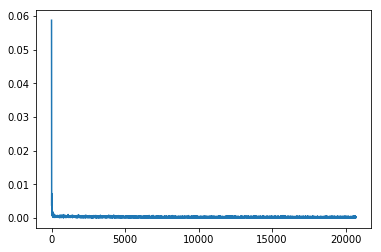

In [10]:
from matplotlib import pyplot as plt
plt.plot(loss_list)
plt.show()

In [11]:
# Guardamos el ultimo modelo
checkpoint_path_model = os.path.join('sin_KP_NoN_Zara02_social12_F', 'model.ckpt')
saver.save(sess,checkpoint_path_model , global_step = global_step)

'sin_KP_NoN_Zara02_social12_F/model.ckpt-20700'

# Restauramos los mosdelos

In [12]:
#Ultimo Modelo
path_model = 'sin_KP_NoN_Zara02_social12_F/model.ckpt-20700'
saver.restore(sess=sess, save_path=path_model)


test_data = batches_data.Dataset(data2, arguments)
print('Evaluating')
results = evaluate(test_data, tester,sess,arguments)
print(results)

W1227 09:10:28.686894 140476992071424 deprecation.py:323] From /home/andrea/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
 12%|#1        | 7/60 [00:00<00:00, 66.65it/s]

Evaluating


100%|##########| 60/60 [00:00<00:00, 67.16it/s]

{'ade': 0.31308496, 'fde': 0.68860126}


In [13]:
#Modelo12
path_model = 'sin_KP_NoN_Zara02_social12/model.ckpt-20700'
saver.restore(sess=sess, save_path=path_model)


test_data = batches_data.Dataset(data2, arguments)
print('Evaluating')
results = evaluate(test_data, tester,sess,arguments)
print(results)

 12%|#1        | 7/60 [00:00<00:00, 65.03it/s]

Evaluating


100%|##########| 60/60 [00:00<00:00, 73.61it/s]


{'ade': 0.31308034, 'fde': 0.68859005}


In [14]:
# Mejor Modelo
path_model = 'sin_KP_NoN_Zara02_social-best12/model_best.ckpt-9300'
saver.restore(sess=sess, save_path=path_model)

test_data = batches_data.Dataset(data2, arguments)
print('Evaluating')
results = evaluate(test_data, tester,sess,arguments)
print(results)

 15%|#5        | 9/60 [00:00<00:00, 82.36it/s]

Evaluating


100%|##########| 60/60 [00:00<00:00, 83.94it/s]


{'ade': 0.31190845, 'fde': 0.6846172}
